In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('../datasets/diabetes.csv')

In [3]:
df.shape

(768, 9)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# splitting data into independent and dependent variables
X = df.iloc[:, 0:8]
y = df["Outcome"] 
print("X shape: ", X.shape)
print("y shape: ", y.shape)

X shape:  (768, 8)
y shape:  (768,)


In [6]:
# standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# splitting into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (691, 8)
X_test shape:  (77, 8)
y_train shape:  (691,)
y_test shape:  (77,)


In [8]:
# define model
model = models.Sequential()
model.add(layers.Dense(100, activation="relu"))
model.add(layers.Dense(50, activation="relu"))
model.add(layers.Dense(25, activation="relu"))
model.add(layers.Dense(12, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

In [9]:
# compile model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [10]:
# train model
history = model.fit(X_train, y_train, epochs=12,verbose=2, validation_data=(X_test, y_test), validation_split=0.2)

Epoch 1/12
22/22 [==============================] - 5s 41ms/step - loss: 0.6523 - accuracy: 0.6411 - val_loss: 0.6085 - val_accuracy: 0.6753
Epoch 2/12
22/22 [==============================] - 1s 24ms/step - loss: 0.5499 - accuracy: 0.7221 - val_loss: 0.5240 - val_accuracy: 0.7792
Epoch 3/12
22/22 [==============================] - 0s 16ms/step - loss: 0.4904 - accuracy: 0.7554 - val_loss: 0.4836 - val_accuracy: 0.7922
Epoch 4/12
22/22 [==============================] - 0s 20ms/step - loss: 0.4638 - accuracy: 0.7887 - val_loss: 0.4806 - val_accuracy: 0.7662
Epoch 5/12
22/22 [==============================] - 0s 9ms/step - loss: 0.4511 - accuracy: 0.7931 - val_loss: 0.4852 - val_accuracy: 0.7662
Epoch 6/12
22/22 [==============================] - 0s 18ms/step - loss: 0.4392 - accuracy: 0.8003 - val_loss: 0.4817 - val_accuracy: 0.7662
Epoch 7/12
22/22 [==============================] - 0s 8ms/step - loss: 0.4313 - accuracy: 0.7959 - val_loss: 0.4780 - val_accuracy: 0.7662
Epoch 8/12
22/2

In [11]:
# evaluate model
result = model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 29ms/step - loss: 0.4848 - accuracy: 0.7662


Text(0, 0.5, 'Accuracy')

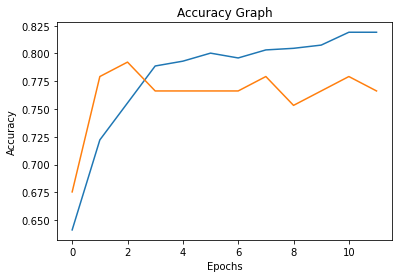

In [12]:
# plot accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title("Accuracy Graph")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Loss')

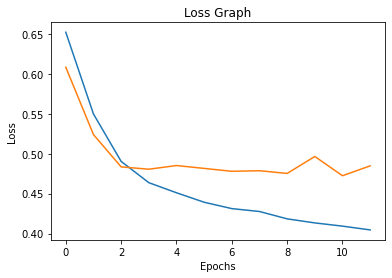

In [13]:
# plot loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title("Loss Graph")
plt.xlabel("Epochs")
plt.ylabel("Loss")